In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


np.random.seed(42)

In [12]:
wine = load_wine()
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['target'] = wine.target


print("Dataset Preview:")
print(data.head())


print("\nDataset Info:")
print(data.info())

Dataset Preview:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar


Missing Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Summary Statistics:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000

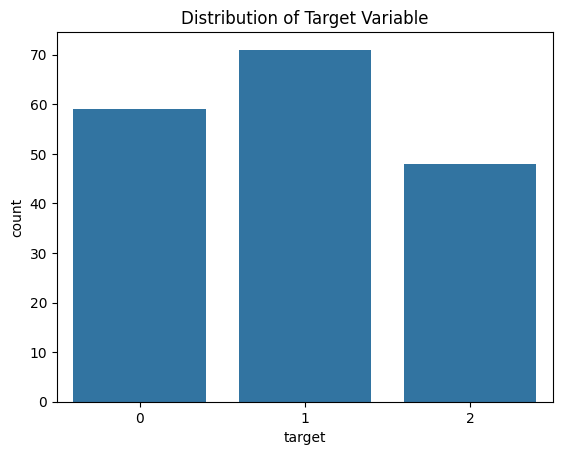

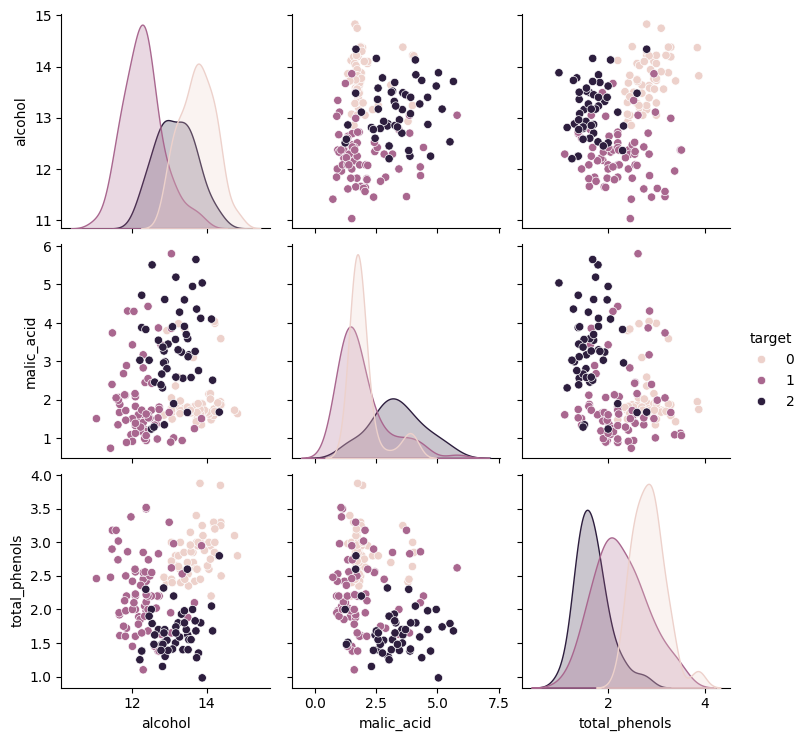

In [13]:
print("\nMissing Values:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())

sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

subset = data[['alcohol', 'malic_acid', 'total_phenols', 'target']]
sns.pairplot(subset, hue='target')
plt.show()

In [14]:
X = data.drop('target', axis=1)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (142, 13)
Testing set shape: (36, 13)


In [22]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

print("First 3 rows of scaled training data:")
print(X_train_scaled[:3])

First 3 rows of scaled training data:
[[ 1.66529275 -0.60840587  1.21896194  1.60540017 -0.16738426  0.80400157
  -0.6916784   1.26722552  1.8775398   3.41947305 -1.65632857 -0.87940904
  -0.24860607]
 [-0.54952506  2.7515415   1.00331502  1.60540017 -0.30437887 -0.78538376
  -1.40123291  2.04959953 -0.87350523 -0.0248012  -0.58463272 -1.25462095
  -0.72992237]
 [-0.74531007 -1.14354109 -0.93750727 -0.28270426 -0.8523573   1.93702874
   1.7467906  -1.00165913  0.58798744 -0.24006834  0.35845962  0.2462267
  -0.24860607]]


In [26]:
model = KNeighborsClassifier(n_neighbors=10)


model.fit(X_train_scaled, y_train)

print("Model training completed.")

Model training completed.


In [27]:
y_pred = model.predict(X_test_scaled)

print("First 10 predictions:", y_pred[:10])

First 10 predictions: [0 0 2 0 1 0 1 2 1 2]


Accuracy: 0.9722222222222222

Confusion Matrix:
[[14  0  0]
 [ 1 13  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



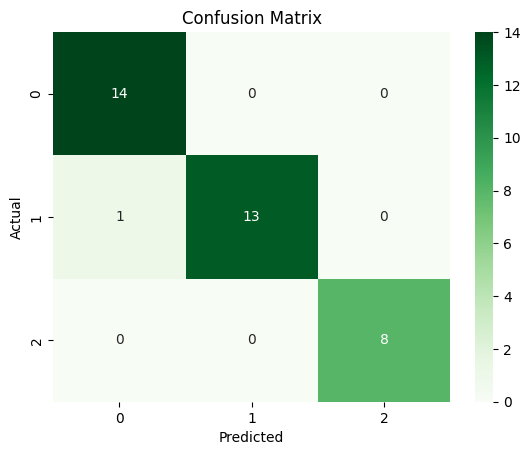

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

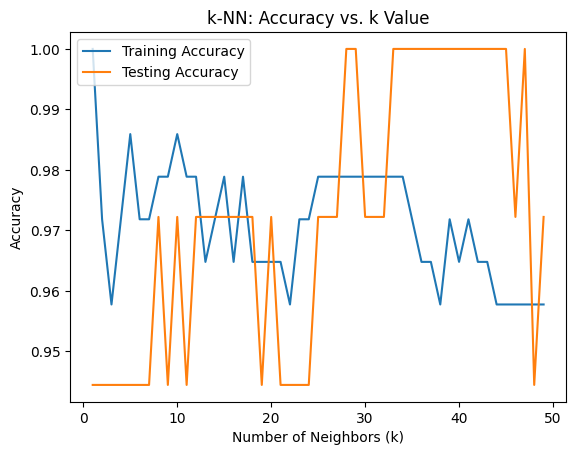

Best k value: 28
Best test accuracy: 1.0
Accuracy with best k: 1.0


In [29]:
k_values = range(1, 50)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot the results
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN: Accuracy vs. k Value')
plt.legend()
plt.show()

# Finding the best k
best_k = k_values[np.argmax(test_scores)]
print("Best k value:", best_k)
print("Best test accuracy:", max(test_scores))

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_scaled, y_train)
y_pred_best = model.predict(X_test_scaled)
print("Accuracy with best k:", accuracy_score(y_test, y_pred_best))